Load Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Load Data

In [11]:
df = pd.read_excel("../Data/Input_Data.xlsx")

Initial Data Exploration

In [12]:
print("\n Data Info:")
df.info()

print("\n Missing values:")
print(df.isnull().sum())

print("\n Descriptive Stats:")
df.describe().T


 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5704 entries, 0 to 5703
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   5704 non-null   datetime64[ns]
 1   OxEnRa      5590 non-null   float64       
 2   BlFuPeIn    5647 non-null   float64       
 3   EnOxFl      5590 non-null   float64       
 4   CoBlFl      5590 non-null   float64       
 5   BlMo        5533 non-null   float64       
 6   BlFuBoGaVo  5590 non-null   float64       
 7   BlFuBoGaIn  5476 non-null   float64       
 8   ThCoTe      5590 non-null   float64       
 9   ToGaPr      5533 non-null   float64       
 10  EnOxPr      5419 non-null   float64       
 11  CoBlPr      5419 non-null   float64       
 12  ToPrDr      5476 non-null   float64       
 13  HoBlPr      5476 non-null   float64       
 14  AcBlVe      5590 non-null   float64       
 15  CoBlTe      5590 non-null   float64       
 16  HoBlTe     

,count,mean,min,25%,50%,75%,max,std
Timestamp,5704,2021-06-24 16:24:46.575385600,2021-05-12 17:56:25,2021-06-01 22:48:28.046249984,2021-06-25 10:02:53,2021-07-15 23:11:50.417999872,2021-08-06 21:52:01,NaN
OxEnRa,5590.0,3.611189,2.631519,3.565113,3.660988,3.720132,3.960638,0.185583
BlFuPeIn,5647.0,13.25744,0.193811,16.375012,16.975658,17.355515,19.073889,7.154725
EnOxFl,5590.0,16956.306269,11799.387,16401.649745,16956.501075,17033.99654,43540.19614,2553.243358
CoBlFl,5590.0,34.246236,32.066071,33.335785,33.607712,33.838924,83.394181,4.955923
BlMo,5533.0,150.331923,118.877259,146.486174,150.727971,154.878239,177.935836,7.267821
BlFuBoGaVo,5590.0,7942.01197,7536.104612,7896.178635,7956.086,8006.05561,8143.976614,92.834051
BlFuBoGaIn,5476.0,80.614852,76.492986,80.150112,80.761833,81.261941,82.604194,0.939073
ThCoTe,5590.0,2218.308424,2081.102063,2201.667093,2220.08551,2237.930667,2294.422412,29.271498
ToGaPr,5533.0,174.579945,0.005692,218.922863,221.850598,222.949223,550.136556,100.257312


Data Cleaning

In [13]:
# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values (basic approach – can be refined)
df = df.fillna(method="ffill")  # forward fill

C:\Users\gaurav.khandelwa\AppData\Local\Temp\ipykernel_68164\3619405482.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")  # forward fill


Feature Engineering

In [14]:
# Lags of Former SI (FoSI)
df["FoSI_lag1"] = df["FoSI"].shift(1)
df["FoSI_lag2"] = df["FoSI"].shift(2)
df["FoSI_lag3"] = df["FoSI"].shift(3)

# Difference in Theoretical Combustion Temperature
df["ThCoTe_diff"] = df["ThCoTe"].diff(1)


# Rolling average of past SI values (lag features)
df["FoSI_rolling3"] = df["FoSI"].rolling(window=3).mean()

Correlation with Target (SI)

 Top 10 positively correlated with SI:
 FoSI             0.622014
FoSI_rolling3    0.485113
FoSI_lag1        0.304275
FoSI_lag3        0.274647
FoSI_lag2        0.269691
ToPrDr           0.212404
EnOxPr           0.211547
BlHu             0.199237
CoBlTe           0.189790
HoBlPr           0.129788
Name: SI, dtype: float64

 Top 10 negatively correlated with SI:
 BlMo          -0.246971
AcBlVe        -0.245883
ThCoTe        -0.182746
BlFuBoGaIn    -0.147260
BlFuBoGaVo    -0.139167
OxEnRa        -0.127409
ThCoTe_diff   -0.097127
EnOxFl        -0.067258
HoBlTe        -0.008740
HoBl          -0.008494
Name: SI, dtype: float64


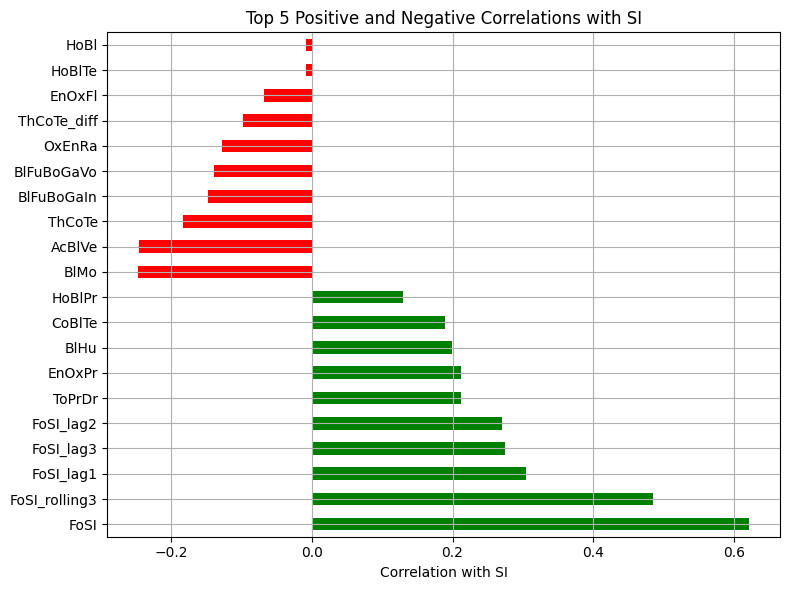

In [16]:
# Compute correlation matrix with numeric features only
correlation_matrix = df.corr(numeric_only=True)

# Get correlations with SI
si_corr = correlation_matrix["SI"].drop("SI")  # Drop self-correlation

# Top 10 positively correlated features
top_pos_corr = si_corr.sort_values(ascending=False).head(10)
print(" Top 10 positively correlated with SI:\n", top_pos_corr)

# Top 10 negatively correlated features
top_neg_corr = si_corr.sort_values(ascending=True).head(10)
print("\n Top 10 negatively correlated with SI:\n", top_neg_corr)

# Optional: Combine and plot
import matplotlib.pyplot as plt

top_combined = pd.concat([top_pos_corr, top_neg_corr])
top_combined.plot(kind='barh', figsize=(8, 6), color=['green' if c > 0 else 'red' for c in top_combined])
plt.title("Top 5 Positive and Negative Correlations with SI")
plt.xlabel("Correlation with SI")
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\gaurav.khandelwa\Desktop\Test-Gaurav_Khandelwal\SI_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


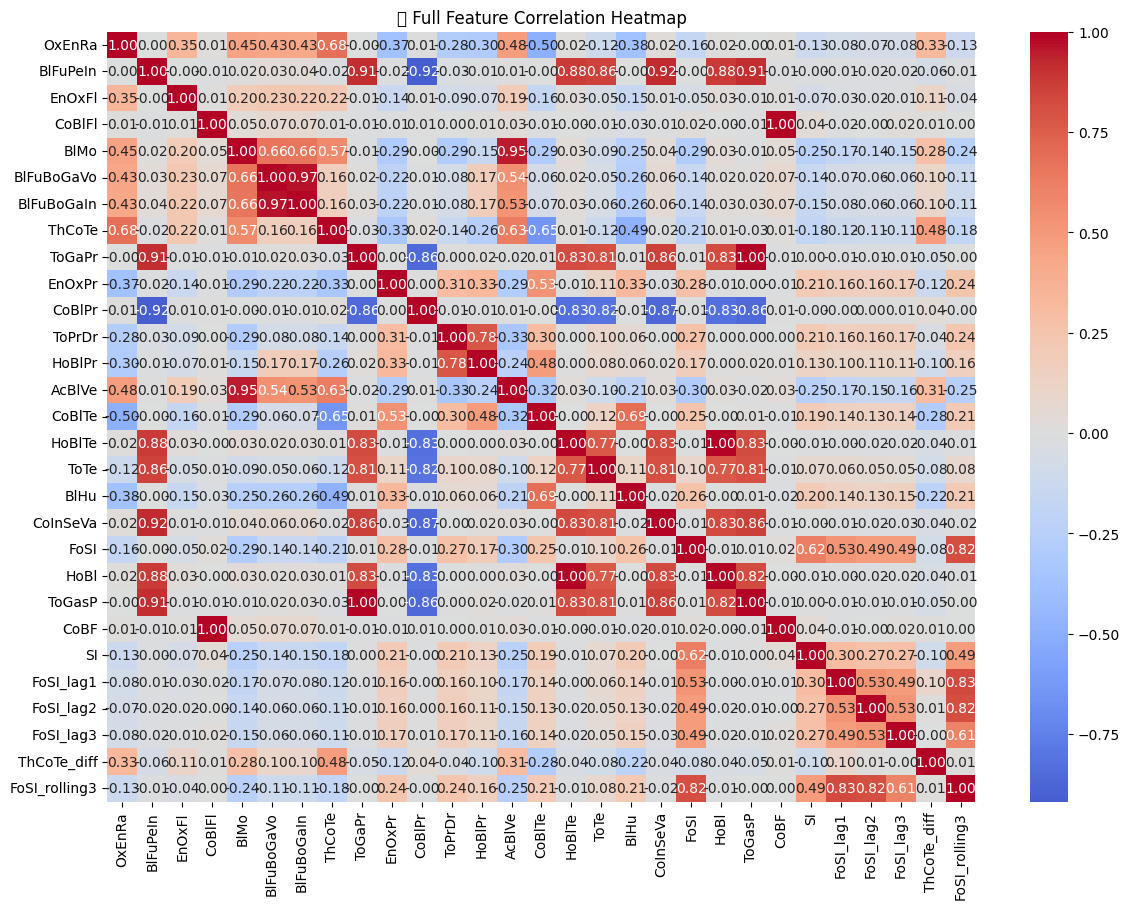

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("🔗 Full Feature Correlation Heatmap")
plt.show()

Checking for Multicollinearity and dropping irrelavant columns

In [20]:
# Subset to model features only
model_features = df[[
    'OxEnRa', 'BlFuPeIn', 'EnOxFl', 'CoBlFl', 'BlMo',
       'BlFuBoGaVo', 'BlFuBoGaIn', 'ThCoTe', 'ToGaPr', 'EnOxPr', 'CoBlPr',
       'ToPrDr', 'HoBlPr', 'AcBlVe', 'CoBlTe', 'HoBlTe', 'ToTe', 'BlHu',
       'CoInSeVa', 'FoSI', 'HoBl', 'ToGasP', 'CoBF', 'FoSI_lag1',
       'FoSI_lag2', 'FoSI_lag3', 'ThCoTe_diff', 'FoSI_rolling3'
]]

# Correlation matrix
corr_matrix = model_features.corr().abs()

# Upper triangle only (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation > 0.9
high_corr_pairs = [
    (col1, col2, corr_val)
    for col1 in upper.columns
    for col2, corr_val in upper[col1].items()
    if corr_val > 0.9
]

# Display highly correlated pairs
for col1, col2, corr_val in sorted(high_corr_pairs, key=lambda x: -x[2]):
    print(f"{col1} <> {col2}: Correlation = {corr_val:.3f}")


ToGasP <> ToGaPr: Correlation = 1.000
HoBl <> HoBlTe: Correlation = 1.000
CoBF <> CoBlFl: Correlation = 0.997
BlFuBoGaIn <> BlFuBoGaVo: Correlation = 0.968
AcBlVe <> BlMo: Correlation = 0.952
CoInSeVa <> BlFuPeIn: Correlation = 0.923
CoBlPr <> BlFuPeIn: Correlation = 0.918
ToGaPr <> BlFuPeIn: Correlation = 0.912
ToGasP <> BlFuPeIn: Correlation = 0.912


In [21]:
cols_to_drop = [
    'ToGasP',  # duplicate of ToGaPr
    'HoBl',    # duplicate of HoBlTe
    'CoBF',    # duplicate of CoBlFl
    'BlFuBoGaVo',  # redundant with BlFuBoGaIn
    'BlMo',        # redundant with AcBlVe
    'CoInSeVa',    # redundant with BlFuPeIn
    'CoBlPr',      # redundant with BlFuPeIn
    'ToGaPr'       # too correlated with BlFuPeIn, and less interpretable
]


In [22]:
df.drop(columns=cols_to_drop, inplace=True)

In [23]:
df.to_csv("../Data/processed_data.csv", index=False)